<a href="https://colab.research.google.com/github/abhinavravi1/SEI-GROWTH-MODELLING/blob/main/SEI_Growth_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/scipy/optimize/_lsq/common.py:320: RuntimeWarning: invalid value encountered in multiply
  y = t * (a * t + b) + c


     message: `xtol` termination condition is satisfied.
     success: True
      status: 3
         fun: [-1.502e-05 -1.000e+00]
           x: [ 2.635e-56  1.082e-01]
        cost: 0.50001501630387
         jac: [[ 3.795e+55  4.270e+01]
               [-5.699e+50 -6.412e-04]]
        grad: [-4.727e+39 -3.468e-09]
  optimality: 4.727271431199049e+39
 active_mask: [0 0]
        nfev: 3
        njev: 3


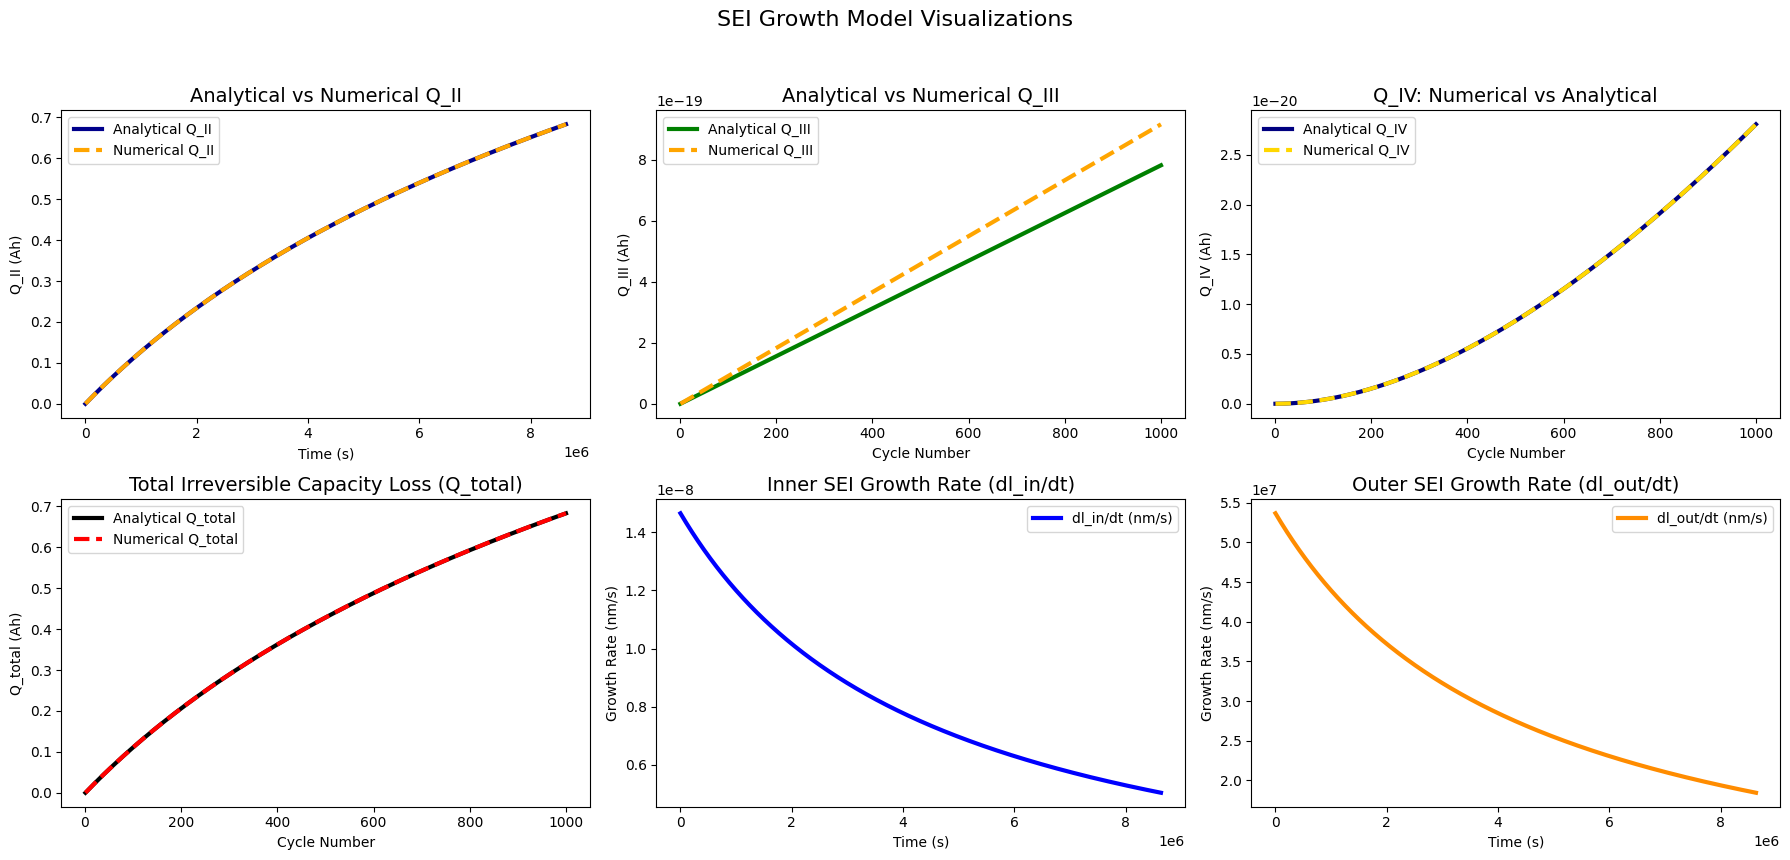

In [5]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve
from scipy.optimize import least_squares
import matplotlib.pyplot as plt


def func(x,in_lay_ini_tic,in_lay_den,far_con,in_mol_m,neg_par_r,tun_rat,cra_per_unit_A,ini_crack_W,stress_amp,ini_crack_L,n,Atilda,Btilda):

    f1=((16*in_lay_ini_tic*in_lay_den*far_con/(tun_rat*in_mol_m))*((22/7)*(neg_par_r**2)*cra_per_unit_A*ini_crack_W*x[0]*((stress_amp*x[1]*np.sqrt((22/7)*ini_crack_L))**-n)))/Atilda-1
    f2=(((2-n)/n)*x[0]*((stress_amp*x[1]*np.sqrt((22/7)*ini_crack_L))**-n)*(ini_crack_L**((2-n)/n)))/Btilda-1

    #f1=Atilda-((16*in_lay_ini_tic*in_lay_den*far_con/(tun_rat*in_mol_m))*((22/7)*(neg_par_r**2)*cra_per_unit_A*ini_crack_W*x[0]))
    #f2=Btilda-(((2-n)/n)*x[0]*(ini_crack_L**((2-n)/n)))
    return [f1,f2]


def Q_two_cal(t,z,x_mean,far_con,grap_den,ele_fer_vel,tun_A,ele_m,delE,red_pla_con,mol_m_grap,in_lyr_ini_th,tun_rat,in_lay_den,in_mol_m,neg_par_r,cra_per_unit_A,ini_crack_W,k,stress_amp,b,pi,ini_crack_L,n,N_cycle):
    # Initial guess for inner_layer_thickness
    inner_layer_thickness = in_lyr_ini_th
    # Update inner_layer_thickness
    inner_layer_thickness = in_lyr_ini_th + (tun_rat * z * in_mol_m) / (2 * tun_A * in_lay_den * far_con)

    k1 = np.sqrt(2 * ele_m * (-delE + 4.4) * 1.6e-19) / red_pla_con
    k2 = np.sqrt(2 * ele_m * delE * 1.6e-19) / red_pla_con
    k3 = np.sqrt(2 * ele_m * (-delE + 2.99) * 1.6e-19) / red_pla_con

    P0 = (16 * k1 * k2**2 * k3) / (k2**2 * (k1 + k3) ** 2 + (k2**2 - k1 * k3) ** 2)

    # Q_two calculation
    Q_two = (((6 + x_mean) * far_con * grap_den * ele_fer_vel * tun_A * P0)
             / (4 * mol_m_grap)) * np.exp((-2 * inner_layer_thickness) * np.sqrt(2 * ele_m * delE * 1.6e-19)/ red_pla_con)

    Q_three =((2*in_lay_den*far_con*inner_layer_thickness)/(in_mol_m*tun_rat))*(8*pi*neg_par_r**2*cra_per_unit_A*ini_crack_W*k)*((stress_amp*b*(pi*ini_crack_L)**0.5)**n)*(1 + ((2-n)/2)*k*(stress_amp*b*pi**0.5)**n * ini_crack_L**((2-n)/2) * N_cycle)**(n/(2-n))

    return [Q_two]

def Q_three_cal(t,z,x_mean,far_con,grap_den,ele_fer_vel,tun_A,ele_m,delE,red_pla_con,mol_m_grap,in_lyr_ini_th,tun_rat,in_lay_den,in_mol_m,neg_par_r,cra_per_unit_A,ini_crack_W,k,stress_amp,b,pi,ini_crack_L,n,N_cycle,Cycle_time):
    # Initial guess for inner_layer_thickness
    inner_layer_thickness = in_lyr_ini_th
    # Update inner_layer_thickness
    inner_layer_thickness = in_lyr_ini_th + (tun_rat * z * in_mol_m) / (2 * tun_A * in_lay_den * far_con)

    k1 = np.sqrt(2 * ele_m * (-delE + 4.4) * 1.6e-19) / red_pla_con
    k2 = np.sqrt(2 * ele_m * delE * 1.6e-19) / red_pla_con
    k3 = np.sqrt(2 * ele_m * (-delE + 2.99) * 1.6e-19) / red_pla_con

    P0 = (16 * k1 * k2**2 * k3) / (k2**2 * (k1 + k3) ** 2 + (k2**2 - k1 * k3) ** 2)

    # Q_two calculation
    Q_two = (((6 + x_mean) * far_con * grap_den * ele_fer_vel * tun_A * P0)
             / (4 * mol_m_grap)) * np.exp((-2 * inner_layer_thickness) * np.sqrt(2 * ele_m * delE * 1.6e-19)/ red_pla_con)

    Q_three =((2*in_lay_den*far_con*inner_layer_thickness)/(in_mol_m*tun_rat))*(8*pi*neg_par_r**2*cra_per_unit_A*ini_crack_W*k)*((stress_amp*b*(pi*ini_crack_L)**0.5)**n)*(1 + ((2-n)/2)*k*(stress_amp*b*pi**0.5)**n * ini_crack_L**((2-n)/2) * N_cycle)**(n/(2-n))

    return [Q_three*Cycle_time]

def Q_IV_analytical(N_vals, bar_A, bar_B, beta_bar, eta, l0_in, n):

    Q_IV_vals = []
    for N in N_vals:
        summation = 0
        for j in range(1, N):  # sum from j=1 to N-1
            term1 = (1 + bar_B * j)**(n / (2 - n))
            term2 = np.log(1 + beta_bar * (N - j))
            summation += term1 * term2
        Q_IV_N = (bar_A * eta / (beta_bar * l0_in)) * summation
        Q_IV_vals.append(Q_IV_N)
    return np.array(Q_IV_vals)

def Q_III_analytical(N_array, n, bar_A, bar_B):
    return ((2 - n)/2) * (bar_A / bar_B) * (
        (1 + bar_B * N_array) ** (2 / (2 - n)) - (1 + bar_B) ** (2 / (2 - n)))

def dQ_IV_dN(N, dAcr_vals, dlin_vals, rho_SEI_in, F, delta, M_SEI_in):

    sum_term = 0.0
    for j in range(1, N):
        dAcr_j = dAcr_vals[j - 1]  # dAcr at cycle j
        dlin_N_minus_j = dlin_vals[N - j - 1]  # dlin at cycle (N-j)
        sum_term += dAcr_j * dlin_N_minus_j

    b = (2 * rho_SEI_in * F) / (delta * M_SEI_in)
    return b * sum_term

def Q_II_analytical(t_array, alpha, beta):
    return alpha * np.log(1 + beta * t_array)

# PARAMETERS
in_lay_ini_tic = 1.16e-9 #initial thickness on inner SEI layer, m
in_lay_den = 2.110e3# inner_layer_density, kg/m^3
far_con = 96487 # faraday_constant, C/mol
grap_den = 2.1e3 # graphite_density, kg/m^3
ele_fer_vel = 2.5e6 #electron_fermi_velocity m/s
tun_A = 6e-13 # tunnelling_area, m^2
mol_m_grap = 72.07e-3 # molar_mass_graphite, kg/mol
ele_m = 9.11e-31 #electron_mass kg
red_pla_con = 1.04e-34 # reduced_planck_const J·s
in_mol_m = 73.89e-3 #inner_molar_mass kg/mol
in_lyr_ini_th = 1.16e-9 #inner_layer_initial_thickness m
neg_par_r = 2.0e-6 # negative_particle_radius
cra_per_unit_A = 245e16 #cracks_per_unit_area
ini_crack_W = 2e-9 #initial_crack_width

ini_crack_L = 2e-9 #initial_crack_length
yng_mod = 33e9 #young_modulus
par_mol_V = 8.9E-6 #partial_molar_volume
poi_rat = 0.2 # poisson_ratio
eff_dif = 7.5E-11 # effective_diffusion
por = 0.65 # porosity
ele_A = 1.17E-5 # electrode_area
elec_thick = 38E-6 # electrode_thickness
g = 8.314 #
pi = 3.14

Atilda = 0.0683
Btilda = 0.5669

# INPUT VARIABLES (example values)
x_mean = 1 # dimensionless
temp = 60 # C
DOD = 0.504 # Depth of charge
c_rate = 0.42 # current

N_cycle = 1000 # number of cycles
#Cycle_time = 24 # Cycle time, hr
Cycle_time = int(2*DOD*3600/c_rate) # Cycle time, hr

# EQUATIONS
# Parameters to be estimated
n = -4.6191
#arrhenius_dE = 8200
arrhenius_dE = (20274.4-432.55*c_rate-76.2383*DOD)*g
#arrhenius_k = 1.6E-9
arrhenius_k = (np.exp(64.2263-1.37279*c_rate-0.21668*DOD))
#b = 1.12
b=-2.96188-0.00607*c_rate+0.012151*DOD+0.076365*temp
delE = (3.2636 - 0.0325 * x_mean - 0.0099 * temp + 0 * x_mean**2 - 0.0035 * x_mean * temp - 7.0274e-5 * temp**2)
tun_rat = (4.0561e-15 - 1.1934e-16 * temp - 1.5642e-15 * x_mean + 8.8548e-19 * temp**2 + 2.6243e-17 * x_mean * temp + 0 * x_mean**2) # tunnelling_ratio

# Pre-parameters calculations
k=arrhenius_k*np.exp(-arrhenius_dE/((temp+273)*g))
I_charge = 7*c_rate
I_discharge = -7*c_rate
t_charge = (DOD*3600)/c_rate
stress_amp= -((yng_mod*par_mol_V*neg_par_r**2 * I_discharge)/(20*(1 - poi_rat)*far_con*eff_dif*por*ele_A*elec_thick))+((yng_mod*par_mol_V*neg_par_r**2 * I_charge)/(20*(1 - poi_rat)*far_con*eff_dif*por*ele_A*elec_thick))+((yng_mod*par_mol_V*I_charge*t_charge)/(9*(1-poi_rat)*far_con*por*ele_A*elec_thick))

# Roots Estimations
#root = fsolve(func, [0.01, 0.01],args=(in_lay_ini_tic,in_lay_den,far_con,in_mol_m,neg_par_r,tun_rat,cra_per_unit_A,ini_crack_W,stress_amp,ini_crack_L,n,Atilda,Btilda),xtol=0.0001)
#print(root)

root1=least_squares(func,(0.01,0.1),bounds = ((0, 0), (100, 100)),args=(in_lay_ini_tic,in_lay_den,far_con,in_mol_m,neg_par_r,tun_rat,cra_per_unit_A,ini_crack_W,stress_amp,ini_crack_L,n,Atilda,Btilda),method='dogbox')
print(root1)
# Initial Conditions
Q_two_0=0
Q_three_0=0

# Creating a list of interval for get the data
start = 0
t_eval = list(range(start,Cycle_time*N_cycle,Cycle_time))

sol = solve_ivp(Q_two_cal, [0, N_cycle*Cycle_time], [Q_two_0] ,method='LSODA',args = (x_mean,far_con,grap_den,ele_fer_vel,tun_A,ele_m,delE,red_pla_con,mol_m_grap,in_lyr_ini_th,tun_rat,in_lay_den,in_mol_m,neg_par_r,cra_per_unit_A,ini_crack_W,k,stress_amp,b,pi,ini_crack_L,n,N_cycle),dense_output=True,t_eval=t_eval)
sol1 = solve_ivp(Q_three_cal, [0, N_cycle*Cycle_time], [Q_three_0] ,method='LSODA',args = (x_mean,far_con,grap_den,ele_fer_vel,tun_A,ele_m,delE,red_pla_con,mol_m_grap,in_lyr_ini_th,tun_rat,in_lay_den,in_mol_m,neg_par_r,cra_per_unit_A,ini_crack_W,k,stress_amp,b,pi,ini_crack_L,n,N_cycle,Cycle_time),dense_output=True,t_eval=t_eval)

sol.y.shape
sol1.y.shape
# Convert Q_two to Ah
Q_two_Ah = sol.y / 3600
Q_three_Ah = sol1.y / 3600

# Data for the plot
t = sol.t.tolist()
y = Q_two_Ah.T.tolist()

t1 = sol1.t.tolist()
y1 = Q_three_Ah.T.tolist()

k1 = np.sqrt(2 * ele_m * (-delE + 4.4) * 1.6e-19) / red_pla_con
k2 = np.sqrt(2 * ele_m * delE * 1.6e-19) / red_pla_con
k3 = np.sqrt(2 * ele_m * (-delE + 2.99) * 1.6e-19) / red_pla_con
P0 = (16 * k1 * k2**2 * k3) / (k2**2 * (k1 + k3)**2 + (k2**2 - k1 * k3)**2)
alpha = (red_pla_con * tun_A * in_lay_den * far_con) / (tun_rat * in_mol_m * np.sqrt(2 * ele_m * delE * 1.6e-19))

beta_1 = ((6 + x_mean) * grap_den * ele_fer_vel * tun_rat * in_mol_m * P0 * np.sqrt(2 * ele_m * delE * 1.6e-19)) / (4 * red_pla_con * in_lay_den * mol_m_grap)

beta_exp = np.exp((-2 * in_lyr_ini_th * np.sqrt(2 * ele_m * delE * 1.6e-19)) / red_pla_con)

beta = beta_1 * beta_exp
t_array = np.array(t_eval)

# Compute analytical Q_II(t)
Q_II_analytical_vals = Q_II_analytical(t_array, alpha, beta)

# Convert to Ah
Q_II_analytical_Ah = Q_II_analytical_vals / 3600

hbar = 1.0545718e-34  # Reduced Planck constant (J·s)
m = ele_m  # electron mass
Delta_E = delE * 1.6e-19  # Convert eV to J

delta = 0.15  # SEI porosity (example value, can be adjusted)
M_out_SEI = 78.94e-3  # molar mass of outer SEI layer, kg/mol (e.g., CuO)
rho_out_SEI = 5.5e3  # density of outer SEI layer, kg/m³
At = tun_A  # Area over which SEI grows, m²
F = far_con  # Faraday constant

dl_in_dt = (hbar / (2 * np.sqrt(2 * m * Delta_E))) * (beta / (1 + beta * t_array))
out1 = ((1 - delta) * M_out_SEI) / (2 * At * rho_out_SEI * F)
dl_out_dt = out1 * (alpha * beta / (1 + beta * t_array))

# Compute bar_A and bar_B using Eq. (29) and (30)
R = neg_par_r
rho_cr = cra_per_unit_A
l_cr = ini_crack_W
a0 = ini_crack_L
sigma_amp = stress_amp

bar_A = (16 * in_lay_den * far_con / tun_rat) * pi * R**2 * rho_cr * l_cr * k * (sigma_amp * b * np.sqrt(pi * a0))**n
bar_B = ((2 - n) / 2) * k * (sigma_amp * b * np.sqrt(pi))**n * (a0**((2 - n)/2))

N_vals = np.arange(1, N_cycle + 1)
# Use linear approximation if bar_B is too small
if bar_B < 1e-20:
    Q_III_vals = bar_A * (N_vals - 1)
else:
    Q_III_vals = Q_III_analytical(N_vals, n, bar_A, bar_B)

Q_III_vals_Ah = Q_III_vals / 3600

# Convert numerical Q_III to per-cycle values
Q_III_numerical = np.array(y1).flatten()
Q_III_numerical_per_cycle = Q_III_numerical[:len(N_vals)]

hbar = 1.0545718e-34  # Reduced Planck constant (J·s)
m = ele_m  # electron mass (kg)
Delta_E = delE * 1.6e-19  # Convert eV to J

beta_bar = beta * Cycle_time  # Eq. 34
eta_bar = hbar / (2 * np.sqrt(2 * m * Delta_E)) * beta_bar  # Eq. 33

N_array = np.arange(1, N_cycle + 1)
dlin_vals = eta_bar / (1 + beta_bar * N_array)

dAcr_vals = []
for j in N_array:
    dAcr_j = (8 * pi * neg_par_r**2 * cra_per_unit_A * ini_crack_W * k *
              (stress_amp * b * np.sqrt(pi * ini_crack_L))**n *
              (1 + ((2 - n)/2) * k * (stress_amp * b * np.sqrt(pi))**n * ini_crack_L**((2 - n)/2) * j)**(n / (2 - n)))
    dAcr_vals.append(dAcr_j)
dAcr_vals = np.array(dAcr_vals)

# Compute dQ_IV/dN for all cycles
dQ_IV_vals = []
Q_IV_vals = []
Q_IV = 0.0

for N in range(1, N_cycle + 1):
    dq = dQ_IV_dN(N, dAcr_vals, dlin_vals, in_lay_den, far_con, delta, in_mol_m)
    dQ_IV_vals.append(dq)
    Q_IV += dq
    Q_IV_vals.append(Q_IV)
Q_IV_vals_Ah = np.array(Q_IV_vals) / 3600

Q_IV_vals = Q_IV_analytical(N_vals, bar_A, bar_B, beta_bar, eta_bar, in_lyr_ini_th, n)
Q_IV_vals_Ah = Q_IV_vals / 3600

Q_total_Ah_analytical = Q_II_analytical_Ah + Q_III_vals_Ah + Q_IV_vals_Ah
Q_II_numerical = np.array(y).flatten()        # from sol.y
Q_III_numerical = np.array(y1).flatten()      # from sol1.y
Q_IV_numerical = np.array(Q_IV_vals) / 3600   # already calculated per cycle
Q_II_numerical_per_cycle = Q_II_numerical[:N_cycle]  # Ensure alignment
Q_III_numerical_per_cycle = Q_III_numerical[:N_cycle]
Q_IV_numerical_per_cycle = Q_IV_vals_Ah              # already per cycle

Q_total_Ah_numerical = Q_II_numerical_per_cycle + Q_III_numerical_per_cycle + Q_IV_numerical_per_cycle

fig, axs = plt.subplots(2, 3, figsize=(18, 9))  # 2 rows x 3 columns
fig.suptitle("SEI Growth Model Visualizations", fontsize=16)

# 1. Q_II (Analytical vs Numerical)
axs[0, 0].plot(t, np.array(y).flatten(), color='darkblue', linestyle='-',linewidth=3,label='Analytical Q_II', zorder=2)
axs[0, 0].plot(t, np.array(y).flatten(), color='orange', linestyle='--', linewidth=3,label='Numerical Q_II', zorder=3)
axs[0, 0].set_title("Analytical vs Numerical Q_II", fontsize=14)
axs[0, 0].set_xlabel("Time (s)")
axs[0, 0].set_ylabel("Q_II (Ah)")
axs[0, 0].legend(fontsize=10)

# 2. Q_III (Analytical vs Numerical)
axs[0, 1].plot(N_vals, Q_III_vals_Ah, label='Analytical Q_III', color='green', linewidth=3)
axs[0, 1].plot(N_vals, Q_III_numerical_per_cycle, label='Numerical Q_III', linestyle='--', color='orange', linewidth=3)
axs[0, 1].set_title("Analytical vs Numerical Q_III", fontsize=14)
axs[0, 1].set_xlabel("Cycle Number")
axs[0, 1].set_ylabel("Q_III (Ah)")
axs[0, 1].legend(fontsize=10)

# 3. Q_IV (Analytical vs Numerical)
axs[0, 2].plot(N_vals, Q_IV_vals_Ah, color='navy', linestyle='-', linewidth=3,label='Analytical Q_IV', zorder=2)
axs[0, 2].plot(N_array, Q_IV_vals_Ah, color='gold', linestyle='--', linewidth=3,label='Numerical Q_IV', zorder=3)
axs[0, 2].set_title("Q_IV: Numerical vs Analytical", fontsize=14)
axs[0, 2].set_xlabel("Cycle Number")
axs[0, 2].set_ylabel("Q_IV (Ah)")
axs[0, 2].legend(fontsize=10)

# 4. Total Q = Q_II + Q_III + Q_IV (Analytical vs Numerical)
axs[1, 0].plot(N_vals, Q_total_Ah_analytical, color='black', linestyle='-', linewidth=3,label='Analytical Q_total', zorder=2)
axs[1, 0].plot(N_vals, Q_total_Ah_numerical, color='red', linestyle='--', linewidth=3,label='Numerical Q_total', zorder=3)
axs[1, 0].set_title("Total Irreversible Capacity Loss (Q_total)", fontsize=14)
axs[1, 0].set_xlabel("Cycle Number")
axs[1, 0].set_ylabel("Q_total (Ah)")
axs[1, 0].legend(fontsize=10)

# 5. dl_in/dt
axs[1, 1].plot(t_array, dl_in_dt * 1e9, label="dl_in/dt (nm/s)", color='blue', linewidth=3)
axs[1, 1].set_title("Inner SEI Growth Rate (dl_in/dt)", fontsize=14)
axs[1, 1].set_xlabel("Time (s)")
axs[1, 1].set_ylabel("Growth Rate (nm/s)")
axs[1, 1].legend(fontsize=10)

# 6. dl_out/dt
axs[1, 2].plot(t_array, dl_out_dt * 1e9, label="dl_out/dt (nm/s)", color='darkorange', linewidth=3)
axs[1, 2].set_title("Outer SEI Growth Rate (dl_out/dt)", fontsize=14)
axs[1, 2].set_xlabel("Time (s)")
axs[1, 2].set_ylabel("Growth Rate (nm/s)")
axs[1, 2].legend(fontsize=10)

# Final layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
